In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [115]:
df = pd.read_csv("athlete_events.csv")
regions = pd.read_csv("noc_regions.csv")


In [116]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [117]:
df.shape

(271116, 15)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [119]:
df=df.drop_duplicates()

In [120]:
df=df.merge(regions,on="NOC",how="left")

In [121]:
type(df)


pandas.core.frame.DataFrame

In [122]:
df[['Age','Height','Weight'	]].isnull().sum()

Age        9315
Height    58814
Weight    61527
dtype: int64

In [123]:
df[df['Age'].isnull()]


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
147,54,Mohamed Jamshid Abadi,M,NaN,NaN,NaN,Iran,IRI,1948 Summer,1948,Summer,London,Boxing,Boxing Men's Heavyweight,NaN,Iran,NaN
152,58,Georgi Abadzhiev,M,NaN,NaN,NaN,Bulgaria,BUL,1924 Summer,1924,Summer,Paris,Cycling,"Cycling Men's Road Race, Individual",NaN,Bulgaria,NaN
153,58,Georgi Abadzhiev,M,NaN,NaN,NaN,Bulgaria,BUL,1924 Summer,1924,Summer,Paris,Cycling,"Cycling Men's Road Race, Team",NaN,Bulgaria,NaN
162,66,Mohamed Abakkar,M,NaN,156.0,48.0,Sudan,SUD,1972 Summer,1972,Summer,Munich,Boxing,Boxing Men's Flyweight,NaN,Sudan,NaN
212,102,Sayed Fahmy Abaza,M,NaN,NaN,NaN,Egypt,EGY,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Egypt,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269294,135368,Antonio A. Zucchi,M,NaN,NaN,NaN,Argentina,ARG,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN
269389,135416,Star Zulu,M,NaN,NaN,NaN,Zambia,ZAM,1984 Summer,1984,Summer,Los Angeles,Boxing,Boxing Men's Bantamweight,NaN,Zambia,NaN
269408,135426,Max Zumstein,M,NaN,NaN,NaN,Switzerland,SUI,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,NaN,Switzerland,NaN
269419,135434,Edmundo Ziga Erraz,M,NaN,180.0,95.0,Chile,CHI,1948 Summer,1948,Summer,London,Athletics,Athletics Men's Hammer Throw,NaN,Chile,NaN


In [124]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Height'] = df['Height'].fillna(df['Height'].median())
df['Weight'] = df['Weight'].fillna(df['Weight'].median())


In [125]:
df['Medal'] = df['Medal'].fillna("No Medal")

In [126]:
medal_df = df[df['Medal'] != 'No Medal'] 

In [127]:
country_medals = (
    df.groupby(['region', 'Medal'])
      .size()
      .unstack(fill_value=0)
)


    


In [128]:
country_medals

Medal,Bronze,Gold,No Medal,Silver
region,,,,
Afghanistan,2,0,124,0
Albania,0,0,70,0
Algeria,8,5,534,4
American Samoa,0,0,37,0
Andorra,0,0,169,0
...,...,...,...,...
"Virgin Islands, British",0,0,45,0
"Virgin Islands, US",0,0,293,1
Yemen,0,0,48,0


In [129]:
country_medals['Total'] = country_medals.sum(axis=1)

In [130]:
country_medals = country_medals.sort_values(by='Total', 
ascending=False)

In [131]:
country_medals.head(10)

Medal,Bronze,Gold,No Medal,Silver,Total
region,,,,,
USA,1358,2638,12967,1641,18604
Germany,1260,1301,12031,1195,15787
France,666,499,10784,602,12551
UK,651,677,10048,739,12115
Russia,1178,1599,7745,1170,11692
Italy,531,575,9031,531,10668
Canada,451,463,8329,438,9681
Japan,357,247,7511,309,8424
Sweden,535,479,6755,522,8291


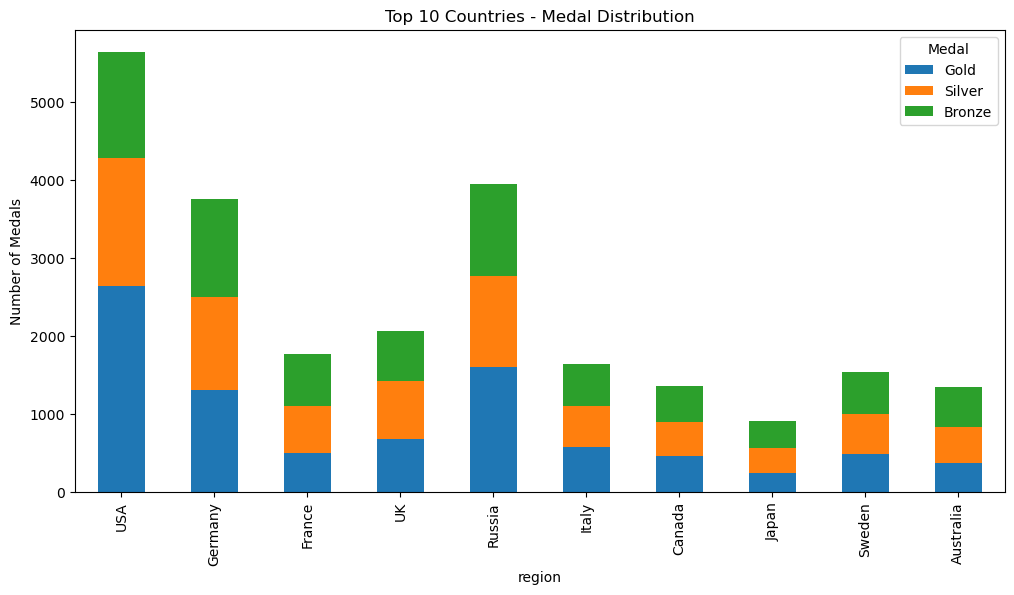

In [132]:
top10 = country_medals.head(10) 
top10[['Gold','Silver','Bronze']].plot( 
kind='bar', 
stacked=True, 
figsize=(12,6)
) 
plt.title("Top 10 Countries - Medal Distribution") 
plt.ylabel("Number of Medals") 
plt.show() 

In [133]:
yearly_medals = ( 
medal_df.groupby(['Year','region']) 
.size() 
.reset_index(name='Total_Medals')
)

In [134]:
yearly_medals

,Year,region,Total_Medals
0,1896,Australia,3
1,1896,Austria,5
2,1896,Denmark,6
3,1896,France,11
4,1896,Germany,32
...,...,...,...
1424,2016,Ukraine,15
1425,2016,United Arab Emirates,1
1426,2016,Uzbekistan,13
1427,2016,Venezuela,3


In [135]:
top_countries = ['United States','China','Russia','India'] 
trend = yearly_medals[ 
yearly_medals['region'].isin(top_countries) 
] 

In [136]:
top_countries

['United States', 'China', 'Russia', 'India']

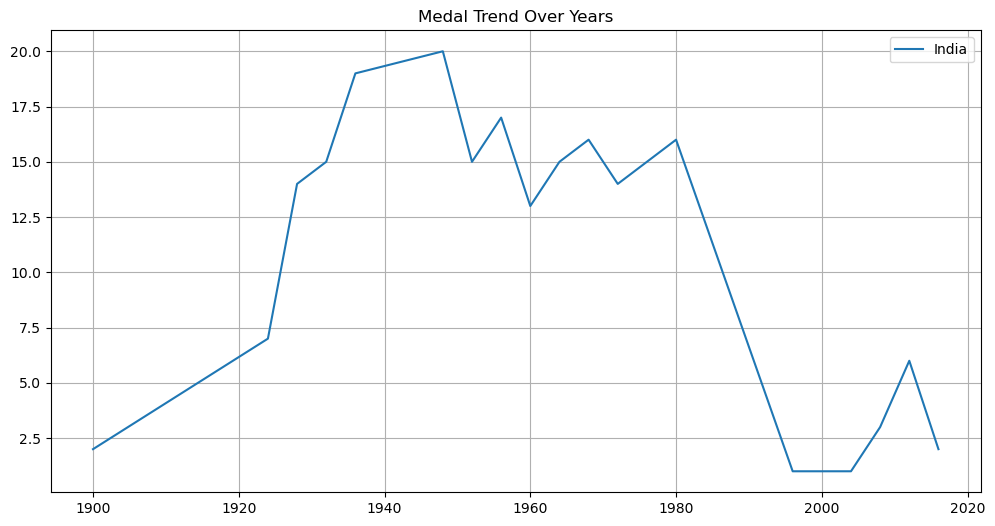

In [145]:

plt.figure(figsize=(12,6)) 
for country in top_countries: 
   data = trend[trend['region']==country] 
plt.plot(data['Year'], data['Total_Medals'], label=country)
plt.grid(True)
plt.legend() 
plt.title("Medal Trend Over Years") 
plt.show() 


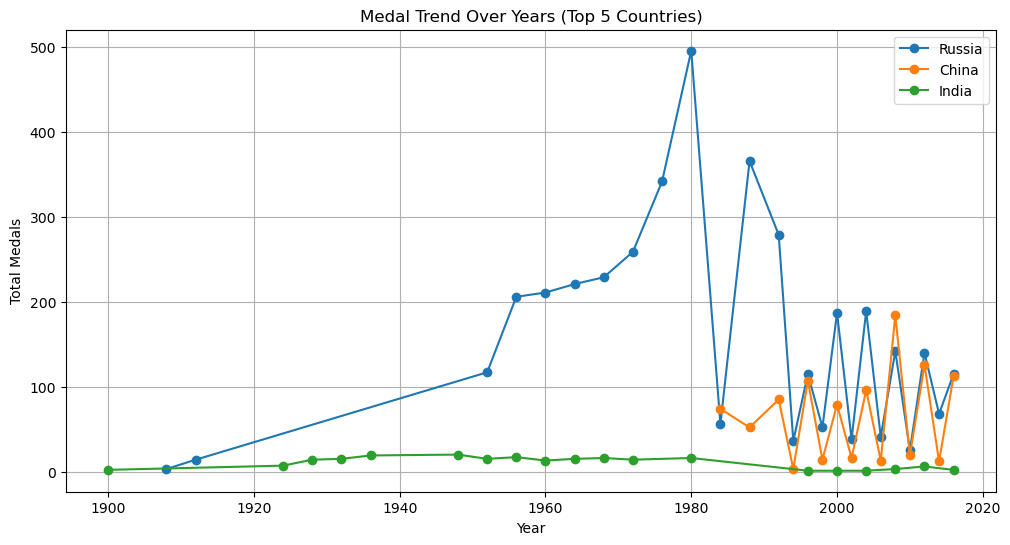

In [148]:
import matplotlib.pyplot as plt

# Step 1: Get Top 5 Countries by Total Medals
top_countries = (
    trend.groupby('region')['Total_Medals']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

top_countries = list(top_countries)

# Step 2: Create Plot
plt.figure(figsize=(12,6))

for country in top_countries:
    data = trend[trend['region'] == country]
    plt.plot(data['Year'], data['Total_Medals'], marker='o', label=country)

# Step 3: Formatting
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.title("Medal Trend Over Years (Top 5 Countries)")
plt.legend()
plt.grid(True)

plt.show()


In [161]:
gender_trend = ( 
df.groupby(['Year','Sex']) 
.size().unstack()

)

In [162]:
gender_trend

Sex,F,M
Year,,
1896,NaN,380.0
1900,33.0,1865.0
1904,16.0,1285.0
1906,11.0,1722.0
1908,47.0,3022.0
1912,87.0,3953.0
1920,134.0,4158.0
1924,251.0,5319.0
1928,424.0,4814.0


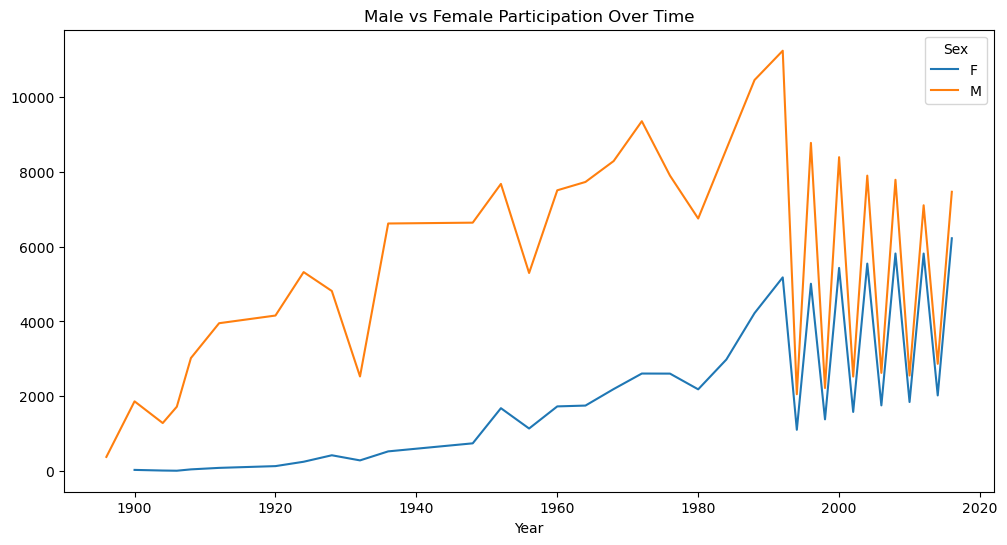

In [167]:
gender_trend.plot(figsize=(12,6)) 
plt.title("Male vs Female Participation Over Time") 
plt.show() 

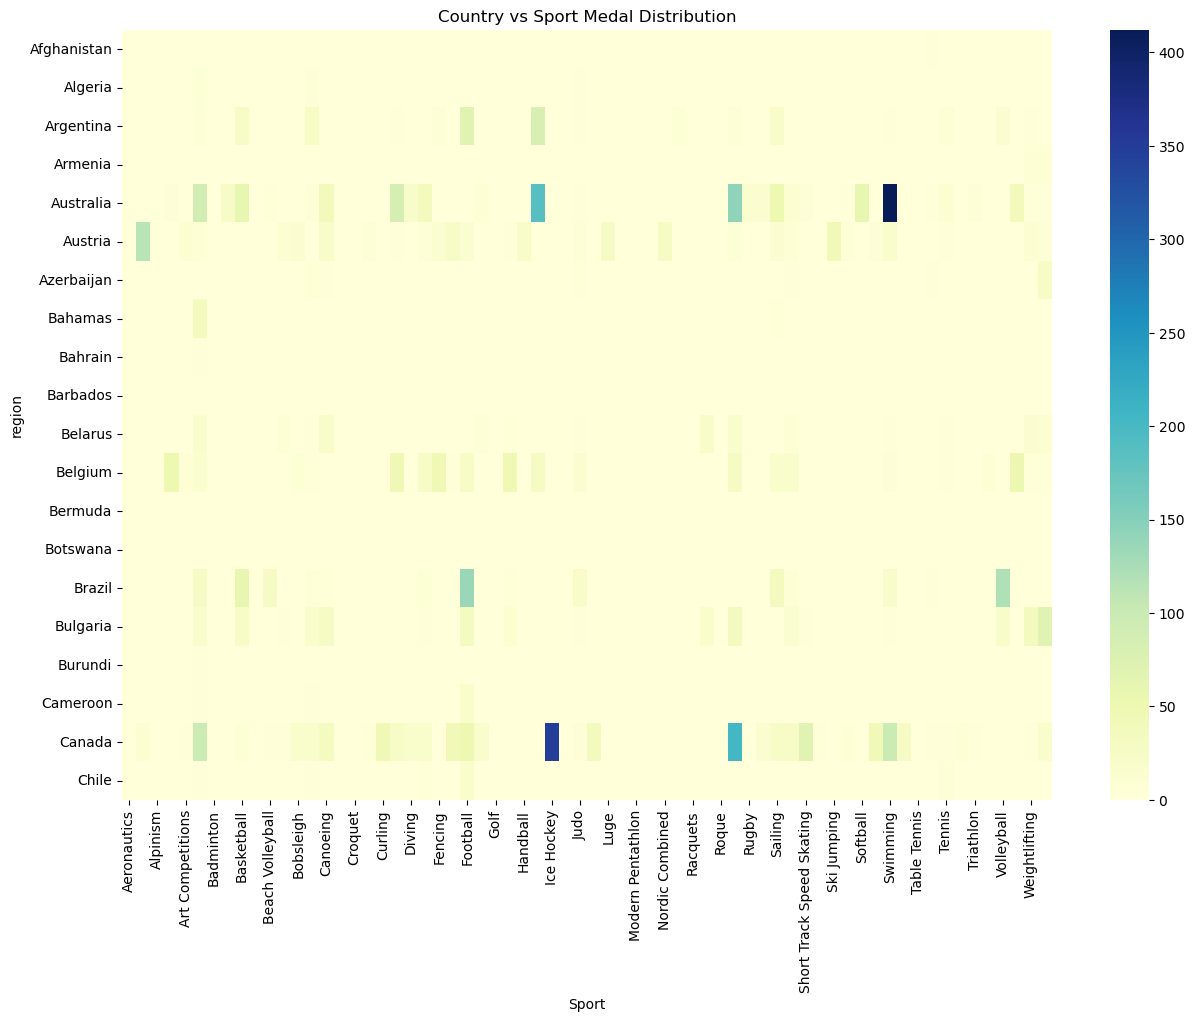

In [168]:
sport_heatmap = ( 
medal_df.groupby(['region','Sport']) 
.size() 
.unstack(fill_value=0) 
) 
plt.figure(figsize=(15,10)) 
sns.heatmap(sport_heatmap.head(20), cmap="YlGnBu") 
plt.title("Country vs Sport Medal Distribution") 
plt.show() 

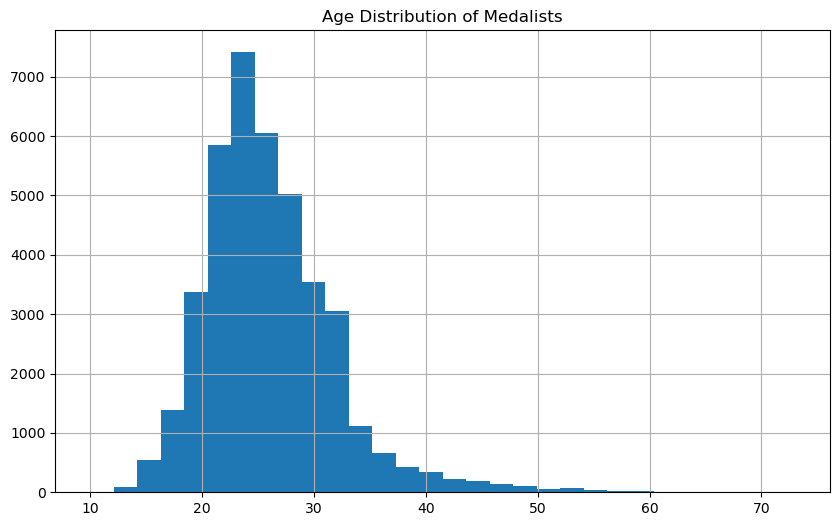

In [177]:
plt.figure(figsize=(10,6)) 
medal_df['Age'].hist(bins=30) 
plt.title("Age Distribution of Medalists") 
plt.show() 